In [19]:
# get plots for most negative polarity change, most positive; keywords
import matplotlib
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
import sqlite3
from textblob import Word
from nltk.corpus import stopwords
import re

database_path = "temporary_database.sqlite3"

In [20]:
conn = sqlite3.connect(database_path)
cur1 = conn.cursor()
cur1.execute("""SELECT response_id, airline, text, polarity_change
FROM INTERACTIONS, TWEETS
WHERE INTERACTIONS.response_id = TWEETS.id AND polarity_change <= -0.5;""")
neg_df = pd.DataFrame(cur1.fetchall(),
                      columns=['response_id', 'airline', 'text', 'polarity_change'])
cur2 = conn.cursor()
cur2.execute("""SELECT response_id, airline, text, polarity_change
FROM INTERACTIONS, TWEETS
WHERE INTERACTIONS.response_id = TWEETS.id AND polarity_change >= 0.5;""")
pos_df = pd.DataFrame(cur2.fetchall(),
                        columns=['response_id', 'airline', 'text', 'polarity_change'])

In [21]:
stop = stopwords.words('english')
for i in range(len(neg_df)):
    neg_df.apply(lambda x: x.astype(str).str.lower())
neg_df = neg_df.apply(lambda x: x.astype(str).str.lower())
neg_df['text'] = neg_df['text'].str.replace(r'[^\w\s]', '')
neg_df['text'] = neg_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
neg_df['text'] = neg_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

for i in range(len(pos_df)):
    pos_df.apply(lambda x: x.astype(str).str.lower())
pos_df = pos_df.apply(lambda x: x.astype(str).str.lower())
pos_df['text'] = pos_df['text'].str.replace(r'[^\w\s]', '')
pos_df['text'] = pos_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
pos_df['text'] = pos_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

<ipython-input-21-84a79b2deae8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  neg_df['text'] = neg_df['text'].str.replace(r'[^\w\s]', '')
<ipython-input-21-84a79b2deae8>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  pos_df['text'] = pos_df['text'].str.replace(r'[^\w\s]', '')


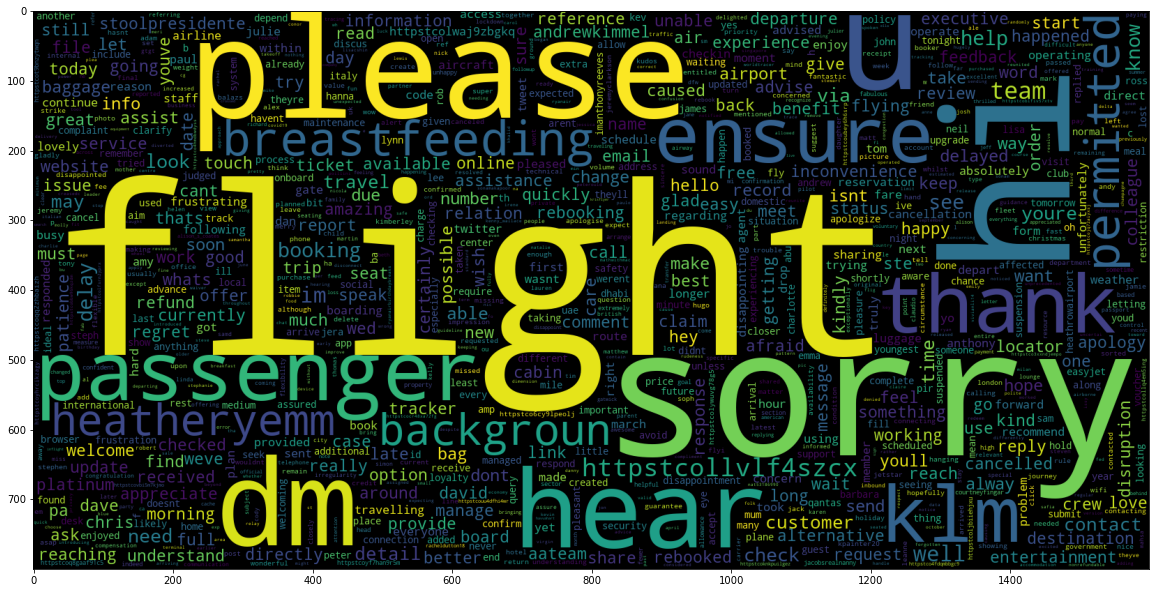

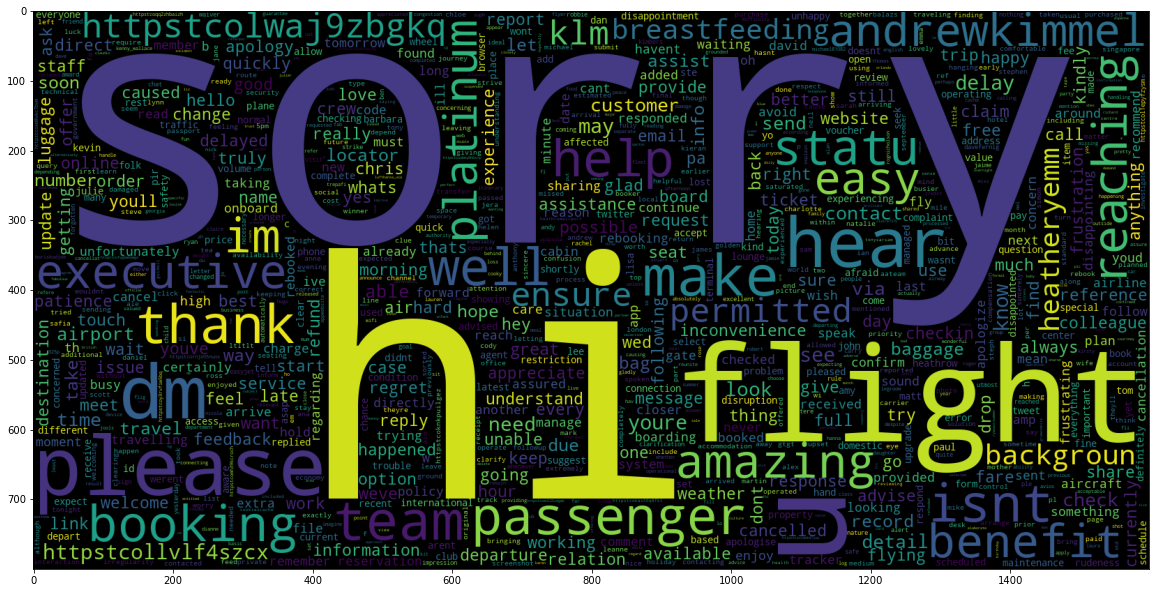

In [22]:
plt.figure(figsize=(20,20))
wcn = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(neg_df['text']))
plt.imshow(wcn)

plt.figure(figsize=(20,20))
wcp = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(pos_df['text']))
plt.imshow(wcp)

In [24]:
# a lot of words appear in both, so two new plots that exclude those words would be nice
neg_words = []
for index, tweet in neg_df.iterrows():
    for word in tweet['text'].split():
        neg_words.append(word)
neg_words = set(neg_words)

pos_words = []
for index, tweet in pos_df.iterrows():
    for word in tweet['text'].split():
        pos_words.append(word)
pos_words = set(pos_words)

clean_neg = []
clean_pos = []

for word in neg_words:
    if word not in pos_words:
        clean_neg.append(word)
    else:
        continue
for word in pos_words:
    if word not in neg_words:
        clean_pos.append(word)

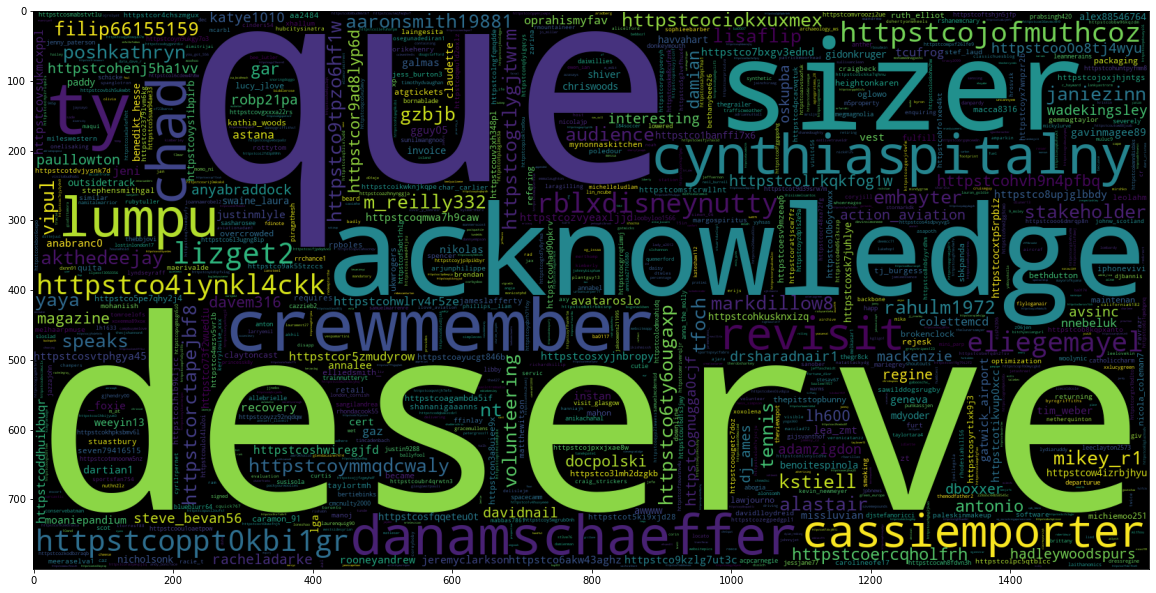

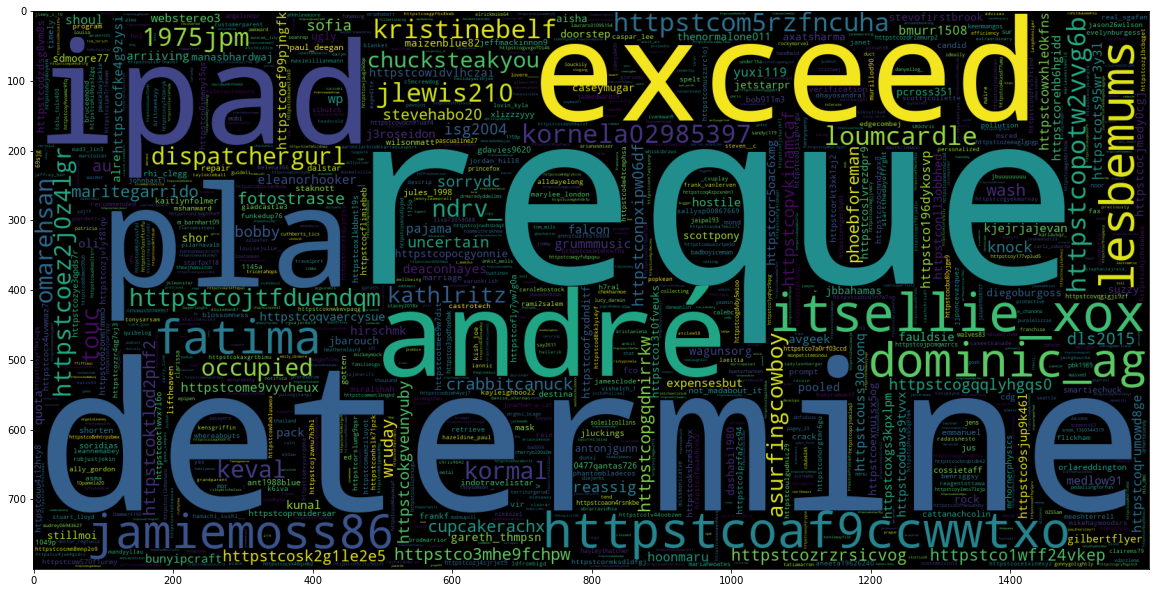

In [25]:
# not that useful unfortunately

plt.figure(figsize=(20,20))
wcn2 = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(clean_neg))
plt.imshow(wcn2)

plt.figure(figsize=(20,20))
wcp2 = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(clean_pos))
plt.imshow(wcp2)